In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


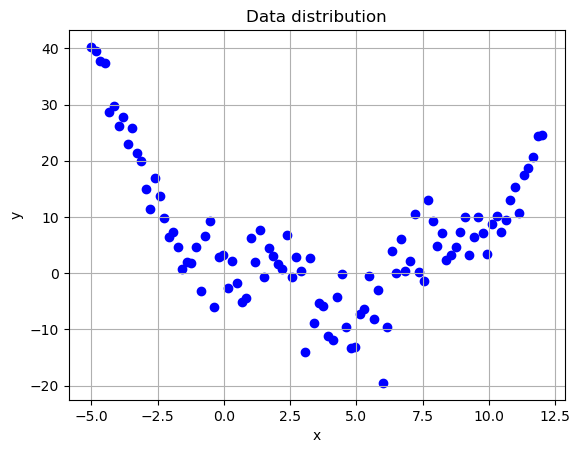

80
20


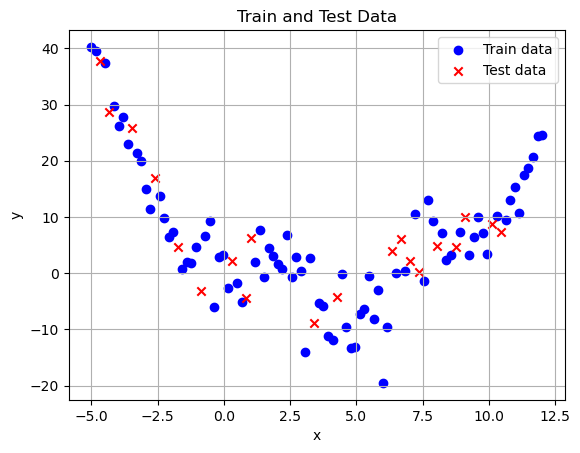

In [28]:
y = np.load('data.npy')
x = np.linspace(-5, 12, len(y))

dataset = np.column_stack((x, y))# Merge x and y together  for create a dataset

plt.scatter(dataset[:,0], dataset[:,1], c='b', marker='o', label='Data points')
plt.title('Data distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=73)#9925973
print(len(train_data))
print(len(test_data))

plt.scatter(train_data[:, 0], train_data[:, 1], c='blue', marker='o', label='Train data')
plt.scatter(test_data[:, 0], test_data[:, 1], c='red', marker='x', label='Test data')
plt.title('Train and Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('dataset.png')
plt.legend()
plt.grid(True)
plt.savefig('train_test_data_plot.png')
plt.show()

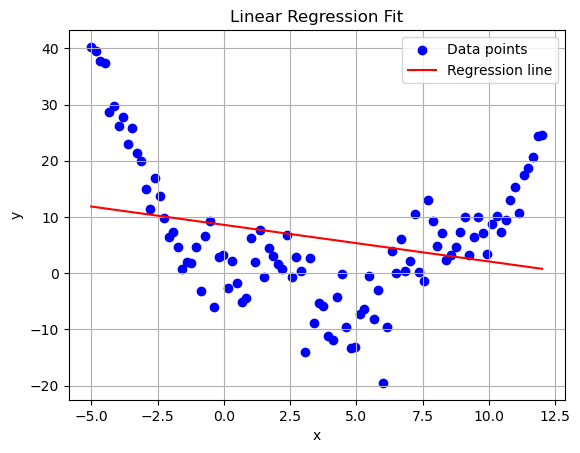

In [21]:
# Extract x and y from dataset
x = dataset[:, 0]  # First column: x
y = dataset[:, 1]  # Second column: y

# Compute parameters for linear regression
n = len(dataset)  # Number of data points
xy = x * y
x2 = x ** 2

m = (n * np.sum(xy) - np.sum(x) * np.sum(y)) / (n * np.sum(x2) - (np.sum(x) ** 2))
b = (np.sum(y) - m * np.sum(x)) / n

# Predicted y values
y_pred = m * x + b

plt.scatter(dataset[:, 0], dataset[:, 1], c='b', marker='o', label='Data points')
plt.plot(x, y_pred, c='r', label='Regression line')
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('linear_regression_fit_line.png')
plt.show()



Linear Regression Model: y = -0.652x + 8.600


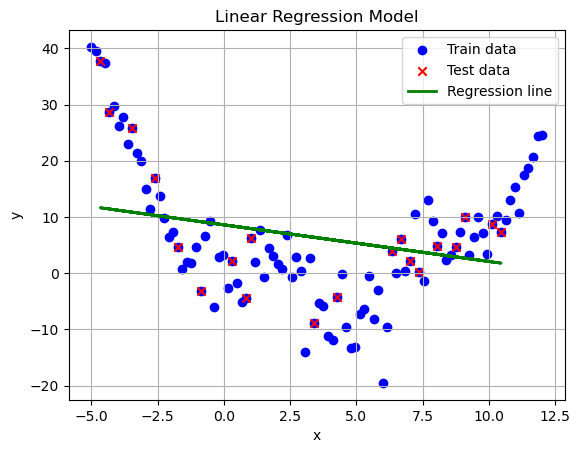

In [22]:
import numpy as np

# جدا کردن داده‌های x و y از داده‌های آموزشی
x_train = dataset[:, 0]
y_train = dataset[:, 1]

# محاسبه میانگین x و y
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)

# محاسبه شیب خط (w)
w = np.sum((x_train - x_mean) * (y_train - y_mean)) / np.sum((x_train - x_mean) ** 2)

# محاسبه عرض از مبدأ (b)
b = y_mean - w * x_mean

print(f"Linear Regression Model: y = {w:.3f}x + {b:.3f}")

# پیش‌بینی روی داده‌های تست
x_test = test_data[:, 0]
y_test = test_data[:, 1]
y_pred = w * x_test + b

# نمایش خط رگرسیون و داده‌ها
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, c='blue', marker='o', label='Train data')
plt.scatter(x_test, y_test, c='red', marker='x', label='Test data')
plt.plot(x_test, y_pred, color='green', label='Regression line', linewidth=2)
plt.title('Linear Regression Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('linear_regression_model.png')
plt.show()


/tmp/ipykernel_39566/3742012353.py:26: RuntimeWarning: invalid value encountered in scalar divide
  w = np.sum((x_sub_train - x_mean) * (y_sub_train - y_mean)) / np.sum((x_sub_train - x_mean) ** 2)


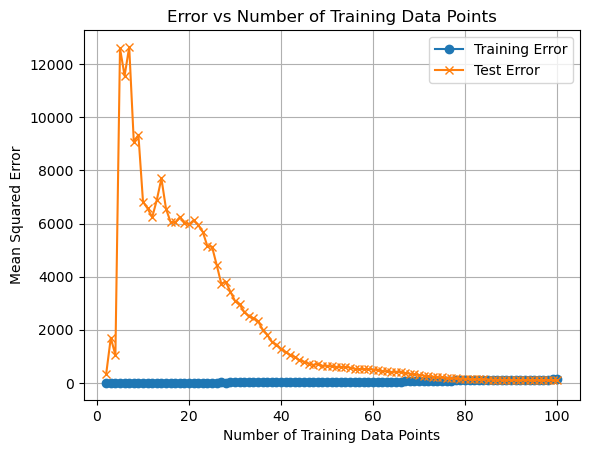

In [23]:
import numpy as np
import matplotlib.pyplot as plt


# Separate training and test data
x_train = dataset[:, 0]
y_train = dataset[:, 1]
x_test = test_data[:, 0]
y_test = test_data[:, 1]

# Lists to store errors
train_errors = []
test_errors = []

# Iterative training
for i in range(1, len(x_train) + 1):
    # Use the first i data points for training
    x_sub_train = x_train[:i]
    y_sub_train = y_train[:i]

    # Calculate mean values
    x_mean = np.mean(x_sub_train)
    y_mean = np.mean(y_sub_train)

    # Calculate slope (w) and intercept (b)
    w = np.sum((x_sub_train - x_mean) * (y_sub_train - y_mean)) / np.sum((x_sub_train - x_mean) ** 2)
    b = y_mean - w * x_mean

    # Calculate predictions and errors for training data
    y_train_pred = w * x_sub_train + b
    train_error = np.mean((y_sub_train - y_train_pred) ** 2)
    train_errors.append(train_error)

    # Calculate predictions and errors for test data
    y_test_pred = w * x_test + b
    test_error = np.mean((y_test - y_test_pred) ** 2)
    test_errors.append(test_error)

# Plot errors
plt.plot(range(1, len(x_train) + 1), train_errors, label='Training Error', marker='o')
plt.plot(range(1, len(x_train) + 1), test_errors, label='Test Error', marker='x')
plt.title('Error vs Number of Training Data Points')
plt.xlabel('Number of Training Data Points')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.savefig('error_vs_training_data.png')
plt.show()

# Explanation:
# As the number of training data points increases, the training error typically decreases
# because the model has more information to fit the data. However, the test error may initially
# decrease and then stabilize or slightly increase due to overfitting in some cases.

/tmp/ipykernel_39566/2246913515.py:20: RuntimeWarning: invalid value encountered in scalar divide
  w = np.sum((x_subset - x_mean) * (y_subset - y_mean)) / np.sum((x_subset - x_mean) ** 2)


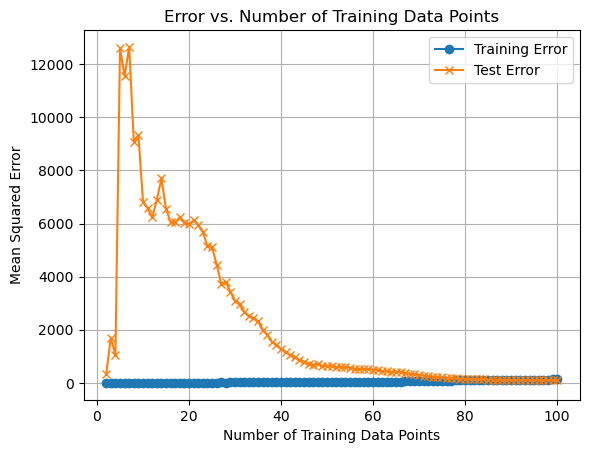

In [26]:
import numpy as np
import matplotlib.pyplot as plt


# لیست برای ذخیره خطاها
train_errors = []
test_errors = []

# حلقه برای افزایش تعداد داده‌های آموزشی
for i in range(1, len(x_train) + 1):
    # انتخاب داده‌های آموزشی تا مرحله i
    x_subset = x_train[:i]
    y_subset = y_train[:i]
    
    # محاسبه میانگین x و y
    x_mean = np.mean(x_subset)
    y_mean = np.mean(y_subset)
    
    # محاسبه شیب خط (w) و عرض از مبدا (b)
    w = np.sum((x_subset - x_mean) * (y_subset - y_mean)) / np.sum((x_subset - x_mean) ** 2)
    b = y_mean - w * x_mean
    
    # پیش‌بینی داده‌های آموزشی
    y_train_pred = w * x_subset + b
    train_error = np.mean((y_subset - y_train_pred) ** 2)
    train_errors.append(train_error)
    
    # پیش‌بینی داده‌های آزمون
    y_test_pred = w * x_test + b
    test_error = np.mean((y_test - y_test_pred) ** 2)
    test_errors.append(test_error)

# رسم نمودار خطا
plt.plot(range(1, len(x_train) + 1), train_errors, label='Training Error', marker='o')
plt.plot(range(1, len(x_train) + 1), test_errors, label='Test Error', marker='x')
plt.title('Error vs. Number of Training Data Points')
plt.xlabel('Number of Training Data Points')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# ذخیره خطاها
train_errors = []
test_errors = []

# افزودن جملات چندجمله‌ای مرحله به مرحله
max_degree = 5
for degree in range(1, max_degree + 1):
    # ایجاد ویژگی‌های چندجمله‌ای
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    
    # مدل رگرسیون خطی
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    # پیش‌بینی و محاسبه خطا
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# رسم نمودار خطا
plt.plot(range(1, max_degree + 1), train_errors, label='Training Error', marker='o')
plt.plot(range(1, max_degree + 1), test_errors, label='Test Error', marker='x')
plt.title('Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[-5.         -4.82828283 -4.65656566 -4.48484848 -4.31313131 -4.14141414
 -3.96969697 -3.7979798  -3.62626263 -3.45454545 -3.28282828 -3.11111111
 -2.93939394 -2.76767677 -2.5959596  -2.42424242 -2.25252525 -2.08080808
 -1.90909091 -1.73737374 -1.56565657 -1.39393939 -1.22222222 -1.05050505
 -0.87878788 -0.70707071 -0.53535354 -0.36363636 -0.19191919 -0.02020202
  0.15151515  0.32323232  0.49494949  0.66666667  0.83838384  1.01010101
  1.18181818  1.35353535  1.52525253  1.6969697   1.86868687  2.04040404
  2.21212121  2.38383838  2.55555556  2.72727273  2.8989899   3.07070707
  3.24242424  3.41414141  3.58585859  3.75757576  3.92929293  4.1010101
  4.27272727  4.44444444  4.61616162  4.78787879  4.95959596  5.13131313
  5.3030303   5.47474747  5.64646465  5.81818182  5.98989899  6.16161616
  6.33333333  6.50505051  6.67676768  6.84848485  7.02020202  7.19191919
  7.36363636  7.53535354  7.70707071  7.87878788  8.05050505  8.22222222
  8.39393939  8.56565657  8.73737374  8.90909091  9.08080808  9.25252525
  9.42424242  9.5959596   9.76767677  9.93939394 10.11111111 10.28282828
 10.45454545 10.62626263 10.7979798  10.96969697 11.14141414 11.31313131
 11.48484848 11.65656566 11.82828283 12.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

bonous 2

/tmp/ipykernel_39566/1975413378.py:21: RuntimeWarning: invalid value encountered in scalar divide
  w = np.sum((x_subset - x_mean) * (y_subset - y_mean)) / np.sum((x_subset - x_mean) ** 2)


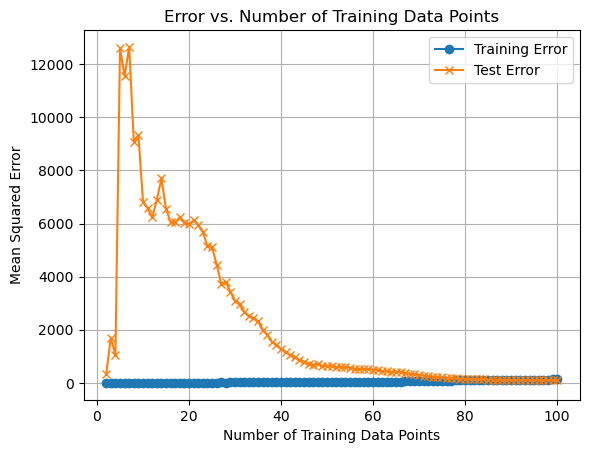

In [27]:
import numpy as np
import matplotlib.pyplot as plt



# لیست برای ذخیره خطاها
train_errors = []
test_errors = []

# حلقه برای افزایش تعداد داده‌های آموزشی
for i in range(1, len(x_train) + 1):
    # انتخاب داده‌های آموزشی تا مرحله i
    x_subset = x_train[:i]
    y_subset = y_train[:i]
    
    # محاسبه میانگین x و y
    x_mean = np.mean(x_subset)
    y_mean = np.mean(y_subset)
    
    # محاسبه شیب خط (w) و عرض از مبدا (b)
    w = np.sum((x_subset - x_mean) * (y_subset - y_mean)) / np.sum((x_subset - x_mean) ** 2)
    b = y_mean - w * x_mean
    
    # پیش‌بینی داده‌های آموزشی
    y_train_pred = w * x_subset + b
    train_error = np.mean((y_subset - y_train_pred) ** 2)
    train_errors.append(train_error)
    
    # پیش‌بینی داده‌های آزمون
    y_test_pred = w * x_test + b
    test_error = np.mean((y_test - y_test_pred) ** 2)
    test_errors.append(test_error)

# رسم نمودار خطا
plt.plot(range(1, len(x_train) + 1), train_errors, label='Training Error', marker='o')
plt.plot(range(1, len(x_train) + 1), test_errors, label='Test Error', marker='x')
plt.title('Error vs. Number of Training Data Points')
plt.xlabel('Number of Training Data Points')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()
